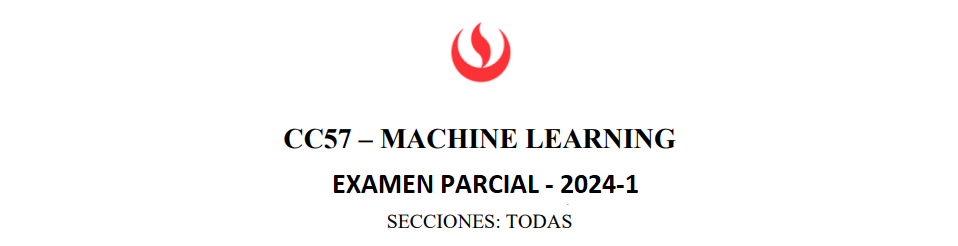



---


**Nombre del Alumno:**  Luis Felipe Poma Astete

**Código:**  202110902


---



Se solicita desarrollar/responder cada una de las siguientes preguntas segun lo descrito en el enunciado **EP - CC57 Machine Learning - parte práctica.pdf** y trabajando con el conjunto de datos **peru_bank.csv**.

#### 1. **En base a la descripción del caso, plantear el objetivo de machine learning. (1 punto)**

Elaborar un modelo de Machine Learning para identificar a los clientes con mayor propensión de abandono y pueda cambiar su decisión de dejar el banco.

#### 2. **Realizar un análisis de identificación y tratamiento de valores faltantes. Presentar sus conclusiones. (1 punto)**

In [15]:
import pandas as pd
import numpy as np

Leemos el dataset

In [5]:
df = pd.read_csv("./peru_bank.csv",sep=";")

Ahora visualizamos repidamente sus datos y tipos

In [7]:
df.head(5)

,CLIENTNUM,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Flag_Muestra
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,4,3,3,3544.0,1661,1883.0,15149,111,0.469,1
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,3,1,3,3421.0,2517,904.0,992,21,0.736,1
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.0,1771,6487.0,1447,23,0.214,1
3,708098133,0,32,F,0,Graduate,Married,Less than $40K,Blue,19,6,1,0,2834.0,1418,1416.0,1598,39,0.500,1
4,708103608,0,52,M,1,High School,Single,$60K - $80K,Blue,45,1,5,1,11898.0,2517,9381.0,15798,128,0.212,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 3254 non-null   int64  
 1   Target                    3254 non-null   int64  
 2   Customer_Age              3254 non-null   int64  
 3   Gender                    3254 non-null   object 
 4   Dependent_count           3254 non-null   int64  
 5   Education_Level           3254 non-null   object 
 6   Marital_Status            3254 non-null   object 
 7   Income_Category           3254 non-null   object 
 8   Card_Category             3254 non-null   object 
 9   Months_on_book            3254 non-null   int64  
 10  Total_Relationship_Count  3254 non-null   int64  
 11  Months_Inactive_12_mon    3254 non-null   int64  
 12  Contacts_Count_12_mon     3254 non-null   int64  
 13  Credit_Limit              3254 non-null   float64
 14  Total_Re

In [10]:
df.describe()

,CLIENTNUM,Target,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Flag_Muestra
count,3.254000e+03,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,7.376497e+08,0.500000,46.371235,2.378304,36.052243,3.613092,2.476644,2.658267,8426.016872,972.857406,7453.159465,3792.009834,56.392747,0.234392,0.799017
std,3.655614e+07,0.500077,7.852928,1.289284,7.910293,1.570544,0.969204,1.140053,9087.977010,894.224310,9103.994080,2942.864547,22.157084,0.280416,0.400797
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000,0.000000
25%,7.126538e+08,0.000000,41.000000,1.000000,32.000000,2.000000,2.000000,2.000000,2404.000000,0.000000,1438.300000,2017.750000,40.000000,0.000000,1.000000
50%,7.172702e+08,0.500000,46.000000,2.000000,36.000000,4.000000,3.000000,3.000000,4345.000000,948.000000,3457.000000,2683.000000,52.000000,0.100000,1.000000
75%,7.718578e+08,1.000000,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,10601.500000,1709.750000,9595.000000,4534.750000,73.000000,0.430750,1.000000
max,8.282949e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,17258.000000,134.000000,0.999000,1.000000


Ahora verificamos si hay valores nulos

In [12]:
df.isnull().sum()

CLIENTNUM                   0
Target                      0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
Flag_Muestra                0
dtype: int64

Ahora verificamos si hya registros duplicados

In [14]:
df.duplicated().sum()

0

En conclusion, podemos observar que la data no presenta valores nulos ni valores duplicados, por lo que realizarle un preprocesamiento adicional no es necesario de momento

#### 3. **Según corresponda, realizar un análisis descriptivo haciendo uso del gráfico de boxplot entre el target y las variables. Presentar sus conclusiones. (1 punto)**


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
numeric_columns = df.select_dtypes(include=[np.int64,np.float64]).columns[2:-1]
categoric_columns = df.select_dtypes(include=[np.object_]).columns

In [78]:
len(numeric_columns)

12

In [63]:
len(categoric_columns)

5

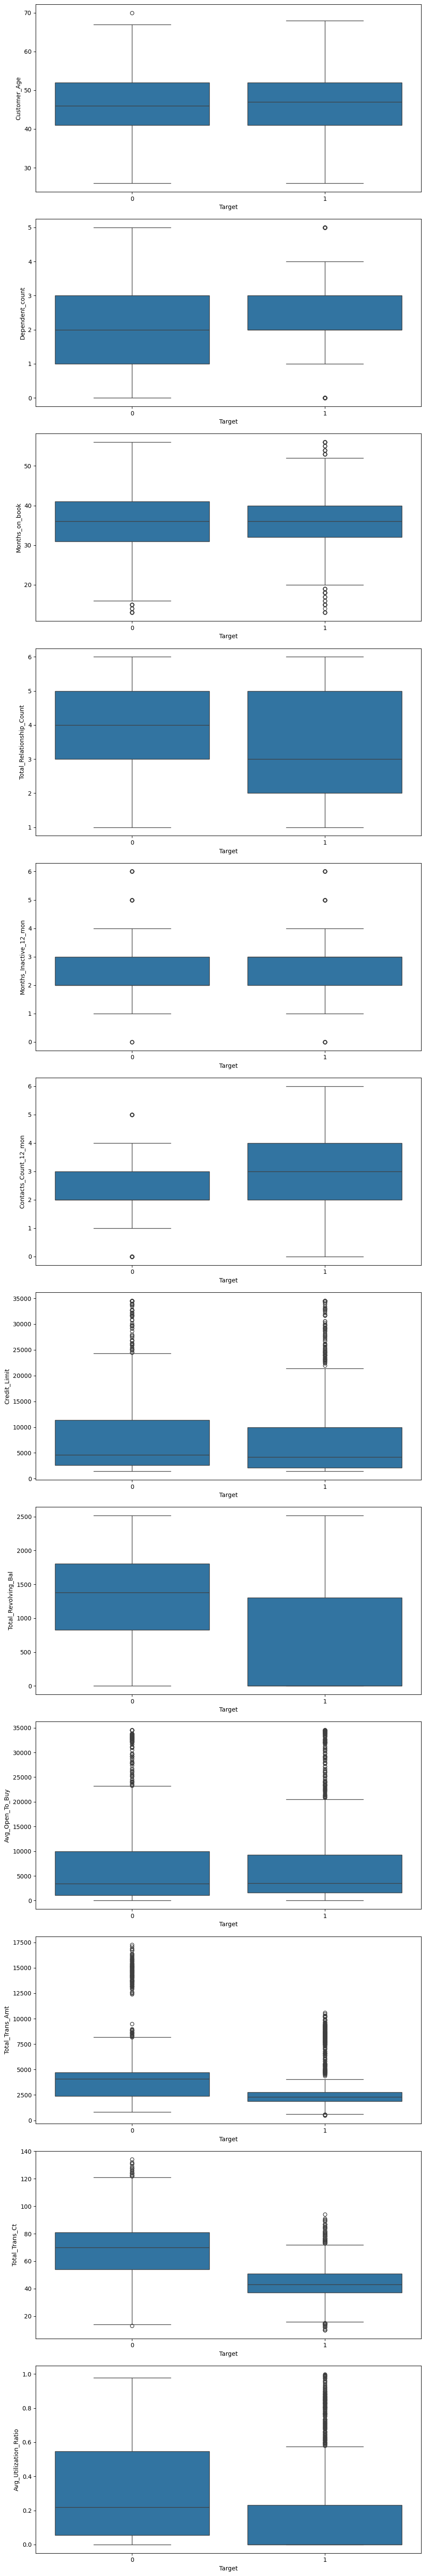

In [95]:
fig, axs = plt.subplots(len(numeric_columns), figsize=(10, 5*len(numeric_columns)))

for i, col in enumerate(numeric_columns):
    sns.boxplot(x='Target', y=col, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

Después de analizar cada gráfico, podemos destacar las siguientes observaciones que nos ayudan a entender mejor el comportamiento de los usuarios de tarjetas de crédito:

- Los usuarios que tienen un **límite de crédito muy bajo** parecen tener una mayor tendencia a cancelar sus tarjetas. Esto podría indicar que estos usuarios pueden estar insatisfechos con su límite de crédito o pueden estar enfrentando dificultades financieras.
- Por otro lado, los usuarios que realizan **transacciones de altas cantidades** tienden a mantener sus tarjetas. Esto podría sugerir que estos usuarios valoran la conveniencia y los beneficios de usar sus tarjetas de crédito para grandes compras o pagos.
- Finalmente, los usuarios que **utilizan sus tarjetas con menor frecuencia** parecen ser más propensos a dar de baja sus tarjetas. Esto podría indicar que estos usuarios no encuentran suficiente valor o utilidad en mantener sus tarjetas de crédito.

#### 4. **Según corresponda, realizar un análisis descriptivo haciendo uso de un gráfico de barras al 100% apilado entre el target y las variables. Presentar sus conclusiones. (1 punto)**

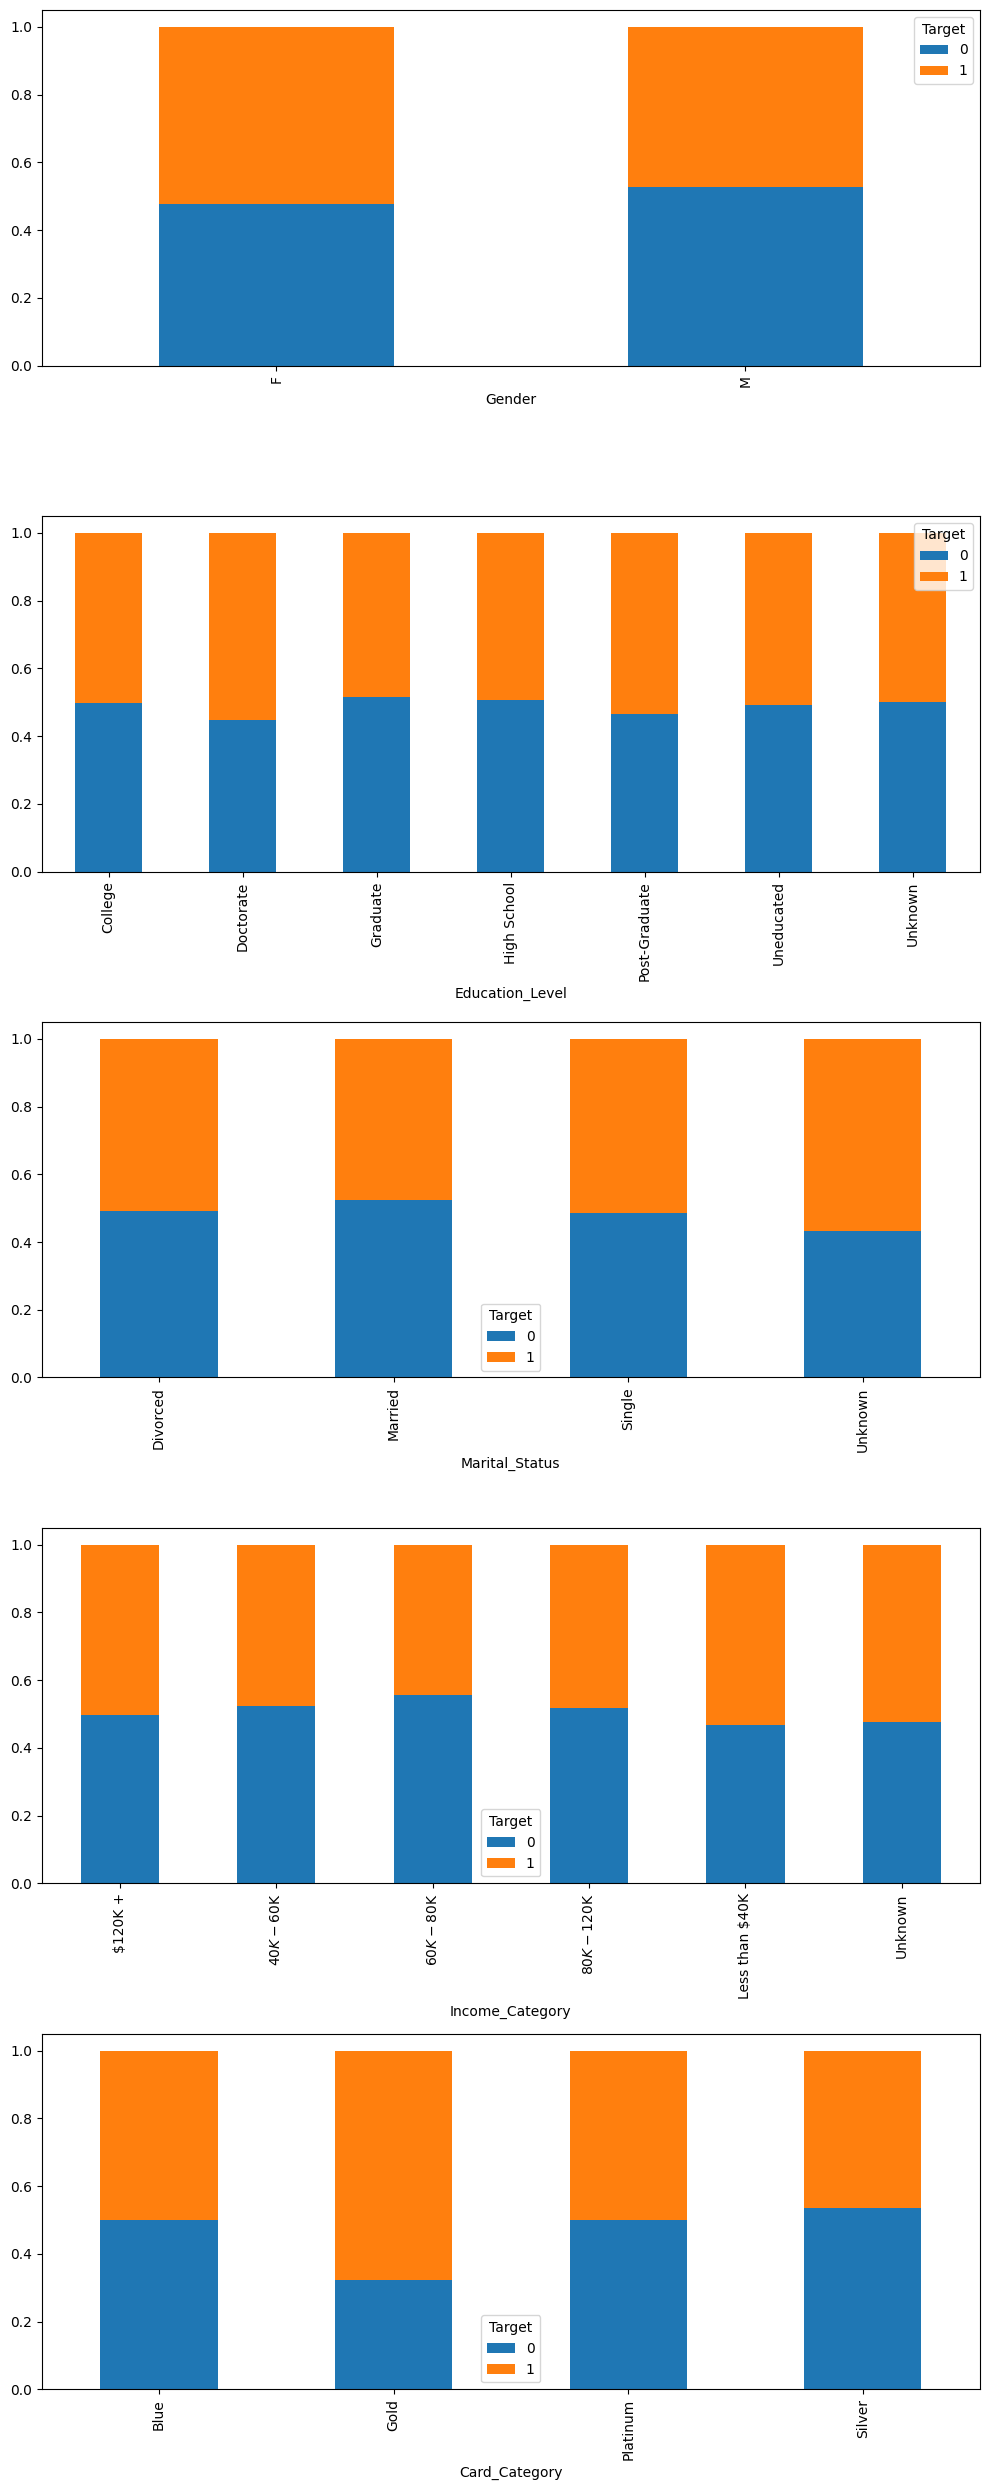

In [110]:
fig, axs = plt.subplots(len(categoric_columns), figsize=(10, 5*len(categoric_columns)))

for i, col in enumerate(categoric_columns):
    # Calcula las proporciones
    proportions = df.groupby(col)['Target'].value_counts(normalize=True).unstack()
    # Crea el gráfico de barras apilado en el subplot correspondiente
    proportions.plot(kind='bar', stacked=True, ax=axs[i])

plt.tight_layout()
plt.show()

Tras analizar cada una de las variables en relación con el objetivo (Target), se observa que todas las variables presentan un equilibrio notable. Sin embargo, al examinar la variable `Card_Category`, se destaca un patrón interesante: la mayoría de los usuarios que poseen una tarjeta de crédito del plan `Gold` han optado por cancelar su tarjeta. Esto podría sugerir que los usuarios del plan `Gold` pueden estar enfrentando desafíos o insatisfacciones específicas que los llevan a dar de baja su tarjeta. Es importante investigar más a fondo para entender las razones subyacentes y abordar eficazmente las necesidades de estos usuarios.

 #### 5. **Haciendo uso del modelo de Machine Learning KNN, programar y presentar una función para determinar el “K” más adecuado en función al AUC. La función debe presentar de manera gráfica en el eje vertical los distintos valores de AUC y en el eje horizontal lo distintos valores de “K” (entre 1 y 30), así como el valor de “K” más adecuado. Presentar sus conclusiones. (3 puntos)**

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier 

In [92]:
df.head(1)

,CLIENTNUM,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Flag_Muestra
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,4,3,3,3544.0,1661,1883.0,15149,111,0.469,1


Se divide la data del `Target`

In [99]:
#Seleccionamos todos los atributos del dataset
#menos la clumna objetivo
X = df.iloc[:,2:-1]
print(X.columns)

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [94]:
#Seleccionamos todos los datos de la clase objetivo
Y = df.iloc[:,1]
print(Y)

0       0
1       1
2       1
3       0
4       0
       ..
3249    1
3250    0
3251    0
3252    1
3253    1
Name: Target, Length: 3254, dtype: int64


Ahora convertimos los categoricos a numericos

In [107]:
label_encoder = LabelEncoder()

X[categoric_columns] = X[categoric_columns].apply(label_encoder.fit_transform)

Posteriormente estandarizamos las variables predictoras

In [109]:
rescalarX = StandardScaler().fit_transform(X)
dataX = pd.DataFrame(data=rescalarX, columns=X.columns)
dataX.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,-0.174641,-0.911689,0.482277,-0.062362,-0.637980,0.750893,-0.257648,-0.006605,0.246391,0.540068,0.299798,-0.537278,0.769660,-0.611931,3.859755,2.464929,0.836769
1,1.481047,1.096866,-1.844954,1.565395,0.729601,-1.229712,-0.257648,1.131327,-0.390429,-1.523798,0.299798,-0.550814,1.727061,-0.719483,-0.951603,-1.597601,1.789071
2,-0.047281,1.096866,0.482277,-1.147534,-2.005561,0.090691,-0.257648,0.246268,1.520030,0.540068,0.299798,-0.018491,0.892690,-0.106141,-0.796968,-1.507323,-0.072733
3,-1.830329,-0.911689,-1.844954,-0.604948,-0.637980,0.750893,-0.257648,-2.156034,1.520030,-1.523798,-2.332063,-0.615415,0.497874,-0.663235,-0.745650,-0.785095,0.947336
4,0.716883,1.096866,-1.069210,-0.062362,0.729601,-0.569510,-0.257648,1.131327,-1.664068,2.603935,-1.454776,0.382100,1.727061,0.211790,4.080322,3.232296,-0.079867


Finalmente antes del entrenamiento dividimos la data

In [115]:
X_train, X_test, Y_train, Y_Test = train_test_split(dataX, Y,
                                                    random_state = 22, test_size=0.2)

Creamos la funcion y la llamamos para obtener el mejor valor para `k`

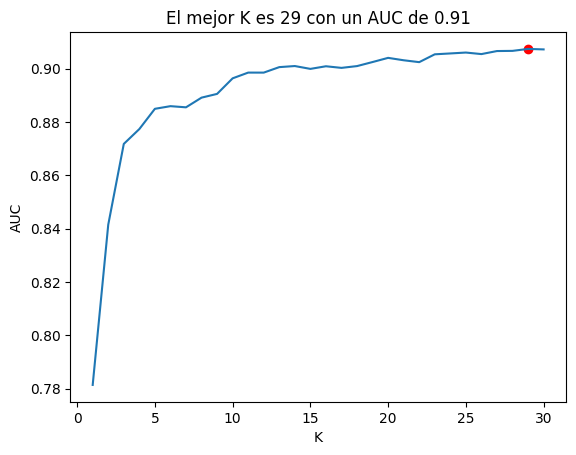

In [127]:
def find_k_best(k = 31):
    auc_scores = []
    k_values = list(range(1, k))

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(Y_Test, y_pred)
        auc_scores.append(auc)

    # Encuentra el valor de 'k' que da el mayor AUC
    best_k = k_values[auc_scores.index(max(auc_scores))]

    # Crea el gráfico
    plt.plot(k_values, auc_scores)
    plt.scatter(best_k, max(auc_scores), color='red')
    plt.xlabel('K')
    plt.ylabel('AUC')
    plt.title(f'El mejor K es {best_k} con un AUC de {max(auc_scores):.2f}')
    plt.show()
    return best_k
best_k = find_k_best()

Tras realizar el entrenamiento con los diferentes valores de `k` en el modelo KNN, hemos descubierto que el valor óptimo de `k` es **29**. Este valor particular de `k` nos proporciona una precisión impresionante de **0.91**, lo que indica un alto nivel de exactitud en las predicciones del modelo. Esto sugiere que nuestro modelo es capaz de identificar correctamente la clase de la mayoría de las observaciones, lo que lo convierte en una herramienta valiosa para nuestras necesidades de análisis.

#### 6. **Programar una función para presentar en una sola gráfica la curva ROC (Receiver Operating Characteristic) haciendo uso de los modelos de Machine Learning Naive Bayes, KNN y Redes Neuronales Artificiales (perceptron u otra RNA). Presentar sus conclusiones. (3 puntos)**

In [124]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


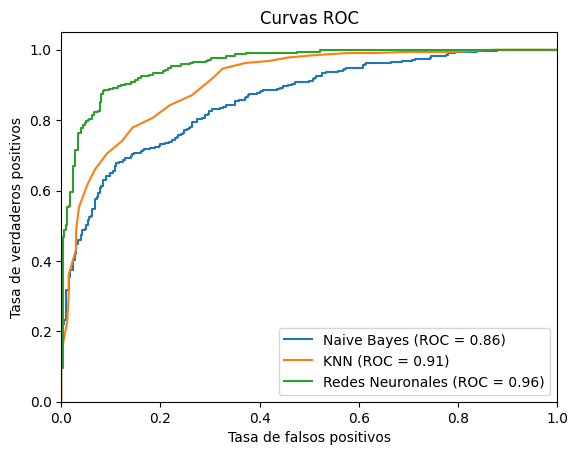

In [133]:
def compare_models():    
    nb = GaussianNB()
    knn = KNeighborsClassifier(n_neighbors=best_k)  # Usamos el 'best_k' de la pregunta anterior
    rna = MLPClassifier()

    # Entrena los modelos y calcula las curvas ROC
    models = [nb, knn, rna]
    model_names = ['Naive Bayes', 'KNN', 'Redes Neuronales']
    for model, name in zip(models, model_names):
        model.fit(X_train, Y_train)
        y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_Test, y_pred)
        roc_auc = auc(fpr, tpr)

        # Dibuja la curva ROC
        plt.plot(fpr, tpr, label=f'{name} (ROC = {roc_auc:.2f})')

    # Añade detalles al gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curvas ROC')
    plt.legend(loc="lower right")
    plt.show()
compare_models()

Tras la implementación y evaluación de tres modelos de aprendizaje automático distintos con el objetivo de predecir si un usuario cancelará su tarjeta de crédito, hemos observado que el modelo de **Redes Neuronales Artificiales** supera a los demás, logrando una precisión de **0.96**. En comparación, los modelos KNN y Naive Bayes alcanzaron precisiones de **0.91** y **0.86** respectivamente.

Por lo tanto, en el contexto de nuestro objetivo de Machine Learning, la Red Neuronal es la opción más adecuada para el despliegue, dada su superior capacidad predictiva. Aunque los modelos KNN y Naive Bayes pueden tener sus fortalezas, en este caso particular, no logran superar el rendimiento de la Red Neuronal.